In [42]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
import warnings
import tensorflow.keras.preprocessing.image as im
warnings.filterwarnings("ignore")

In [43]:
training_images_path = 'seg_train/seg_train'
validation_images_path = 'seg_test/seg_test'
data_dir = pathlib.Path(training_images_path)
test_data = pathlib.Path(validation_images_path)

In [44]:
classes=np.array([item.name for item in data_dir.glob('*') if item.name!='LICENSE.txt'])
print(classes)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


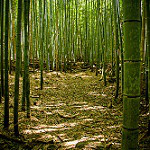

In [45]:
forest = list(data_dir.glob('forest/*'))
PIL.Image.open(str(forest[32]))

In [46]:
batch_size = 32
img_height = 180
img_width = 180

In [47]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.


In [48]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_data,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3000 files belonging to 6 classes.


In [49]:
class_names = train_ds.class_names
print(class_names)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


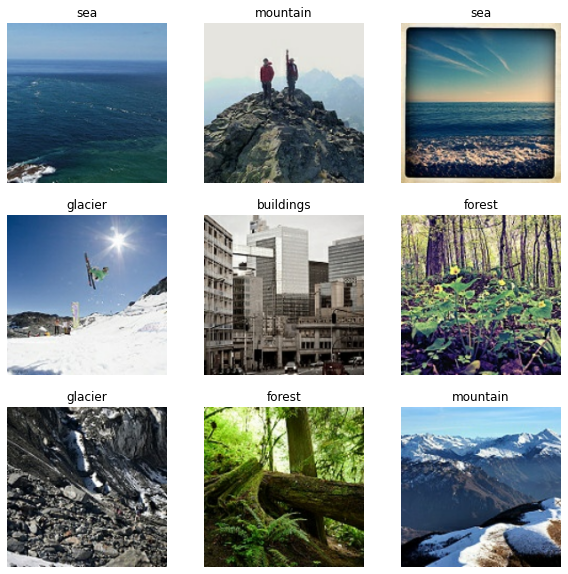

In [50]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [51]:
num_classes = 6

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)), #standardizing the data
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [52]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Epoch 1/5
439/439 [==============================] - 1016s 2s/step - loss: 0.9523 - accuracy: 0.6389 - val_loss: 0.6788 - val_accuracy: 0.7570
Epoch 2/5
439/439 [==============================] - 1022s 2s/step - loss: 0.5981 - accuracy: 0.7810 - val_loss: 0.6022 - val_accuracy: 0.7857
Epoch 3/5
439/439 [==============================] - 970s 2s/step - loss: 0.4185 - accuracy: 0.8537 - val_loss: 0.6450 - val_accuracy: 0.7823
Epoch 4/5
439/439 [==============================] - 1191s 3s/step - loss: 0.2894 - accuracy: 0.8978 - val_loss: 0.8429 - val_accuracy: 0.7610
Epoch 5/5
439/439 [==============================] - 1208s 3s/step - loss: 0.1774 - accuracy: 0.9404 - val_loss: 1.0823 - val_accuracy: 0.7707


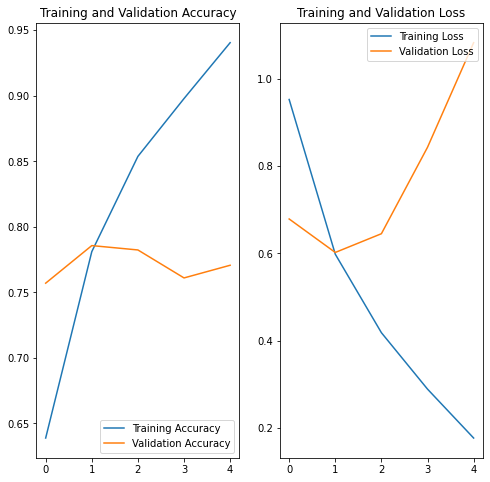

In [53]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

the difference in accuracy between training and validation accuracy is noticeable—a sign of overfitting.

In [54]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [55]:
#dropout technique
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [56]:
epochs = 5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
439/439 [==============================] - 1157s 3s/step - loss: 1.0333 - accuracy: 0.6023 - val_loss: 0.8962 - val_accuracy: 0.6673
Epoch 2/5
439/439 [==============================] - 970s 2s/step - loss: 0.8295 - accuracy: 0.6902 - val_loss: 0.7134 - val_accuracy: 0.7443
Epoch 3/5
439/439 [==============================] - 810s 2s/step - loss: 0.7356 - accuracy: 0.7287 - val_loss: 0.6398 - val_accuracy: 0.7593
Epoch 4/5
439/439 [==============================] - 845s 2s/step - loss: 0.6506 - accuracy: 0.7617 - val_loss: 0.5780 - val_accuracy: 0.7890
Epoch 5/5
439/439 [==============================] - 851s 2s/step - loss: 0.6094 - accuracy: 0.7805 - val_loss: 0.5333 - val_accuracy: 0.8097


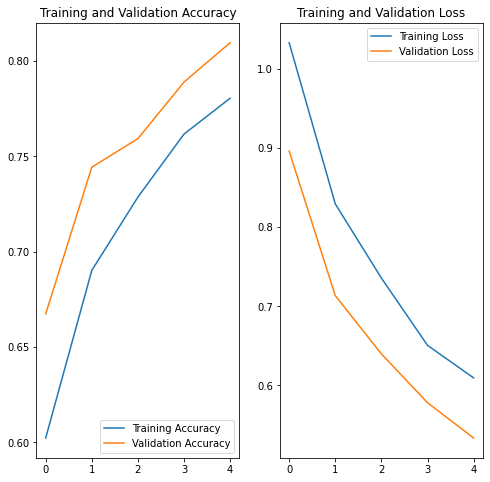

In [57]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



seg_pred/seg_pred/10059.jpg


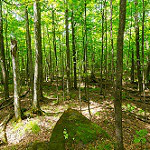

In [81]:
image_path = 'seg_pred/seg_pred/'
image_data = pathlib.Path(image_path)
imageList = list(image_data.glob('*'))
print(imageList[16])
PIL.Image.open(str(imageList[16]))


In [82]:
img = keras.preprocessing.image.load_img(
    imageList[16], target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to forest with a 100.00 percent confidence.


seg_pred/seg_pred/10342.jpg


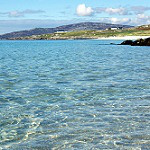

In [94]:
image_path = 'seg_pred/seg_pred/'
image_data = pathlib.Path(image_path)
imageList = list(image_data.glob('*'))
print(imageList[100])
PIL.Image.open(str(imageList[100]))


In [95]:
img = keras.preprocessing.image.load_img(
    imageList[100], target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sea with a 97.01 percent confidence.
